In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler

# 数据预处理 Preprocessing&Impute

## 数据无量纲化

### 数据归一化：MinMaxScaler

In [4]:
data = [[-1,2], [-0.5,6],[0,10], [1,18]]

In [5]:
pd.DataFrame(data)

,0,1
0,-1.0,2
1,-0.5,6
2,0.0,10
3,1.0,18


In [6]:
# 实现归一化
scaler = MinMaxScaler()
scaler = scaler.fit(data)
result = scaler.transform(data)

In [8]:
scaler

MinMaxScaler()

In [9]:
result

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [10]:
result_ = scaler.fit_transform(data)
scaler.inverse_transform(result)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [11]:
result_

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [12]:
# 使用MinMaxScaler的参数feature_range实现将数据归一化到[0,1]以外的范围中
data = [[-1,2], [-0.5,6],[0,10], [1,18]]
scaler = MinMaxScaler(feature_range=[5,10])
result = scaler.fit_transform(data)
result

array([[ 5.  ,  5.  ],
       [ 6.25,  6.25],
       [ 7.5 ,  7.5 ],
       [10.  , 10.  ]])

In [14]:
MinMaxScaler?

In [15]:
# 当X中的特征数量非常多的时候，fit会报错并表示，数据量太大计算不了
# 此时使用partial_fit作为训练接口
# scaler = scaler.partial_fit(data)

In [17]:
# 使用numpy来实现归一化
X = np.array([[-1,2], [-0.5,6],[0,10], [1,18]])
# 归一化
X_nor = (X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))
X_nor

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [18]:
# 逆转归一化
X_returned = X_nor * (X.max(axis=0) - X.min(axis=0)) + X.min(axis=0)
X_returned

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

### 数据标准化：StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
data = [[-1,2], [-0.5,6],[0,10], [1,18]]
scaler = StandardScaler()
scaler = scaler.fit(data)

In [21]:
scaler

StandardScaler()

In [22]:
scaler.mean_

array([-0.125,  9.   ])

In [23]:
scaler.var_

array([ 0.546875, 35.      ])

In [24]:
x_std = scaler.transform(data)

In [25]:
x_std

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [26]:
x_std.mean(), x_std.std()

(0.0, 1.0)

In [28]:
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [29]:
scaler.inverse_transform(x_std)

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

## 缺失值

In [31]:
data = pd.read_csv('./Narrativedata.csv')
data.head()                   

,Unnamed: 0,Age,Sex,Embarked,Survived
0,0,22.0,male,S,No
1,1,38.0,female,C,Yes
2,2,26.0,female,S,Yes
3,3,35.0,female,S,Yes
4,4,35.0,male,S,No


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Unnamed: 0    891 non-null int64
Age           714 non-null float64
Sex           891 non-null object
Embarked      889 non-null object
Survived      891 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 34.9+ KB


In [35]:
# 填补年龄

Age = data.loc[:, 'Age'].values.reshape(-1,1)  # sklearn当中特征矩阵必须使二维
Age[:20]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.],
       [nan],
       [54.],
       [ 2.],
       [27.],
       [14.],
       [ 4.],
       [58.],
       [20.],
       [39.],
       [14.],
       [55.],
       [ 2.],
       [nan],
       [31.],
       [nan]])

In [36]:
from sklearn.impute import SimpleImputer

imp_mean = SimpleImputer()  # 实例化，默认均值填补
imp_median = SimpleImputer(strategy='median') #  用中位数填补
imp_0 = SimpleImputer(strategy='constant', fill_value=0)  # 用0填补

imp_mean = imp_mean.fit_transform(Age)
imp_median = imp_median.fit_transform(Age)
imp_0 = imp_0.fit_transform(Age)

imp_mean[:20], imp_median[:20], imp_0[:20]

(array([[22.        ],
        [38.        ],
        [26.        ],
        [35.        ],
        [35.        ],
        [29.69911765],
        [54.        ],
        [ 2.        ],
        [27.        ],
        [14.        ],
        [ 4.        ],
        [58.        ],
        [20.        ],
        [39.        ],
        [14.        ],
        [55.        ],
        [ 2.        ],
        [29.69911765],
        [31.        ],
        [29.69911765]]), array([[22.],
        [38.],
        [26.],
        [35.],
        [35.],
        [28.],
        [54.],
        [ 2.],
        [27.],
        [14.],
        [ 4.],
        [58.],
        [20.],
        [39.],
        [14.],
        [55.],
        [ 2.],
        [28.],
        [31.],
        [28.]]), array([[22.],
        [38.],
        [26.],
        [35.],
        [35.],
        [ 0.],
        [54.],
        [ 2.],
        [27.],
        [14.],
        [ 4.],
        [58.],
        [20.],
        [39.],
        [14.],
        [55.]

In [38]:
# 在这里用中位数填补Age

data.loc[:,'Age'] = imp_median

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Unnamed: 0    891 non-null int64
Age           891 non-null float64
Sex           891 non-null object
Embarked      889 non-null object
Survived      891 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 34.9+ KB


In [39]:
# 使用众数填补Embarked

Embarked = data.loc[:, 'Embarked'].values.reshape(-1,1)

imp_mode = SimpleImputer(strategy='most_frequent')
data.loc[:,'Embarked'] = imp_mode.fit_transform(Embarked)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Unnamed: 0    891 non-null int64
Age           891 non-null float64
Sex           891 non-null object
Embarked      891 non-null object
Survived      891 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 34.9+ KB


### 使用pands和numpy进行填补

In [40]:
data = pd.read_csv('./Narrativedata.csv')

data.loc[:,'Age'] = data.loc[:,'Age'].fillna(data.loc[:,'Age'].median())
data.dropna(axis=0, inplace=True)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
Unnamed: 0    889 non-null int64
Age           889 non-null float64
Sex           889 non-null object
Embarked      889 non-null object
Survived      889 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 41.7+ KB


## 处理分类型特征：编码与哑变量

### LabelEncoder 标签专用，能够将分类转化为分类数值

In [42]:
from sklearn.preprocessing import LabelEncoder

y = data.iloc[:, -1]

In [43]:
y

0           No
1          Yes
2          Yes
3          Yes
4           No
        ...   
886         No
887        Yes
888         No
889    Unknown
890         No
Name: Survived, Length: 889, dtype: object

In [44]:
np.unique(y)

array(['No', 'Unknown', 'Yes'], dtype=object)

In [45]:
le = LabelEncoder()
le = le.fit(y)
label = le.transform(y)

In [46]:
le.classes_

array(['No', 'Unknown', 'Yes'], dtype=object)

In [47]:
label

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [48]:
le.fit_transform(y)

array([0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2,
       2, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 1, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 2, 2, 2, 2, 2, 0, 2, 0, 1, 0,
       0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,

In [50]:
le.inverse_transform(label)

array(['No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'Unknown', 'Yes', 'No', 'No', 'No', 'Unknown', 'No', 'Yes', 'No',
       'Yes', 'Unknown', 'Yes', 'Yes', 'Yes', 'No', 'Unknown', 'No', 'No',
       'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No',
       'No', 'Yes', 'No', 'No', 'No', 'Unknown', 'Yes', 'No', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'Yes', 'Unknown', 'No', 'Unknown',
       'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Unknown', 'Yes',
       'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'No', 'Unknown', 'No', 'No', 'Yes', 'No', 'No', 'Ye

In [51]:
data.iloc[:,-1] = label
data.head()

,Unnamed: 0,Age,Sex,Embarked,Survived
0,0,22.0,male,S,0
1,1,38.0,female,C,2
2,2,26.0,female,S,2
3,3,35.0,female,S,2
4,4,35.0,male,S,0


### OrdinalEncoder 特征专用，能够将分类特征转化为分类数值

In [52]:
from sklearn.preprocessing import OrdinalEncoder

data_ = data.copy()
data_.head()

,Unnamed: 0,Age,Sex,Embarked,Survived
0,0,22.0,male,S,0
1,1,38.0,female,C,2
2,2,26.0,female,S,2
3,3,35.0,female,S,2
4,4,35.0,male,S,0


In [61]:
OrdinalEncoder().fit(data_.iloc[:, 1:-1]).categories_

[array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
        52., 53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64.,
        65., 66., 67., 68., 69., 70., 71., 72., 73., 74., 75., 76., 77.,
        78., 79., 80., 81., 82., 83., 84., 85., 86., 87.]),
 array([0., 1.]),
 array([0., 1., 2.])]

In [58]:
data_.iloc[:, 1:-1]

,Age,Sex,Embarked
0,28.0,1.0,2.0
1,51.0,0.0,0.0
2,34.0,0.0,2.0
3,47.0,0.0,2.0
4,47.0,1.0,2.0
...,...,...,...
886,35.0,1.0,2.0
887,24.0,0.0,2.0
888,36.0,0.0,2.0
889,34.0,1.0,0.0


In [63]:
data_.iloc[:, 1:-1] = OrdinalEncoder().fit_transform(data_.iloc[:, 1:-1])
data_.head()

,Unnamed: 0,Age,Sex,Embarked,Survived
0,0,28.0,1.0,2.0,0
1,1,51.0,0.0,0.0,2
2,2,34.0,0.0,2.0,2
3,3,47.0,0.0,2.0,2
4,4,47.0,1.0,2.0,0


### OneHotEncoder：独热编码，创建哑变量

In [64]:
data.head()

,Unnamed: 0,Age,Sex,Embarked,Survived
0,0,22.0,male,S,0
1,1,38.0,female,C,2
2,2,26.0,female,S,2
3,3,35.0,female,S,2
4,4,35.0,male,S,0


In [76]:
from sklearn.preprocessing import OneHotEncoder

X = data.iloc[:, 2:-1]

In [77]:
X

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [78]:
enc = OneHotEncoder(categories='auto').fit(X)

In [79]:
result = enc.transform(X).toarray()

In [80]:
OneHotEncoder(categories='auto').fit_transform(X).toarray()

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [81]:
enc.get_feature_names()

array(['x0_female', 'x0_male', 'x1_C', 'x1_Q', 'x1_S'], dtype=object)

In [82]:
result

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [83]:
result.shape

(889, 5)

In [84]:
newdata = pd.concat([data, pd.DataFrame(result)],axis=1)

In [85]:
newdata.head()

,Unnamed: 0,Age,Sex,Embarked,Survived,0,1,2,3,4
0,0.0,22.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,female,C,2.0,1.0,0.0,1.0,0.0,0.0
2,2.0,26.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
3,3.0,35.0,female,S,2.0,1.0,0.0,0.0,0.0,1.0
4,4.0,35.0,male,S,0.0,0.0,1.0,0.0,0.0,1.0


In [86]:
newdata.drop(['Sex','Embarked'],axis=1, inplace=True)

In [87]:
newdata

,Unnamed: 0,Age,Survived,0,1,2,3,4
0,0.0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,2.0,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,3.0,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,4.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
886,886.0,27.0,0.0,1.0,0.0,0.0,0.0,1.0
887,887.0,19.0,2.0,0.0,1.0,1.0,0.0,0.0
888,888.0,28.0,0.0,0.0,1.0,0.0,1.0,0.0
889,889.0,26.0,1.0,NaN,NaN,NaN,NaN,NaN


In [89]:
newdata.columns = ['order','Age', 'Survived', 'Female', 'Male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
newdata.head()

,order,Age,Survived,Female,Male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,22.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,38.0,2.0,1.0,0.0,1.0,0.0,0.0
2,2.0,26.0,2.0,1.0,0.0,0.0,0.0,1.0
3,3.0,35.0,2.0,1.0,0.0,0.0,0.0,1.0
4,4.0,35.0,0.0,0.0,1.0,0.0,0.0,1.0


## 处理连续型特征：二值化与分段

### Binarizer

In [91]:
data_2 = data.copy()
data_2.head()

,Unnamed: 0,Age,Sex,Embarked,Survived
0,0,22.0,male,S,0
1,1,38.0,female,C,2
2,2,26.0,female,S,2
3,3,35.0,female,S,2
4,4,35.0,male,S,0


In [92]:

from sklearn.preprocessing import Binarizer
X = data_2.iloc[:, 1].values.reshape(-1, 1)

In [94]:
transformer = Binarizer(threshold=30).fit_transform(X)

transformer

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],

### KBinsDiscretizer

In [95]:
from sklearn.preprocessing import KBinsDiscretizer

X = data.iloc[:,1].values.reshape(-1,1)
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit_transform(X)

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [2.],
       [0.],
       [1.],
       [0.],
       [0.],
       [2.],
       [0.],
       [1.],
       [0.],
       [2.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [2.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],

In [96]:
set(est.fit_transform(X).ravel())

{0.0, 1.0, 2.0}

In [97]:
est = KBinsDiscretizer(n_bins=3, encode='onehot', strategy='uniform')
est.fit_transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

# 特征选择 feature_selection

In [98]:
data = pd.read_csv('./digit recognizor.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [99]:
X = data.iloc[:, 1:]
y = data.iloc[:,0]

In [101]:
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [102]:
X.shape

(42000, 784)

In [103]:
y.shape

(42000,)

## Filter过滤法

### 方差过滤

####  VarianceThreshold

In [104]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold()  # 实例化， 不填参数默认方差为0
X_var0 = selector.fit_transform(X)

X_var0.shape

(42000, 708)

In [107]:
np.median(X.var().values)

1352.286703180131

In [108]:
x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [109]:
x_fsvar.shape

(42000, 392)

In [110]:
#若特征是伯努利随机变量，假设p=0.8，即二分类特征中某种分类占到80%以上的时候删除特征
X_bvar = VarianceThreshold(.8 * (1 - .8)).fit_transform(X)
X_bvar.shape

(42000, 685)

####  方差过滤对模型的影响

In [113]:
# 1.导入模块并准备数据

from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

import numpy as np

X = data.iloc[:, 1:]
y = data.iloc[:,0]

x_fsvar = VarianceThreshold(np.median(X.var().values)).fit_transform(X)

In [114]:
# 2. KNN方差过滤前

cross_val_score(KNN(), X, y).mean()

0.965857142857143

In [115]:
# 3.KNN方差过滤后
cross_val_score(KNN(), x_fsvar, y).mean()

0.966

In [116]:
# 4. 随机森林方差过滤前
cross_val_scorel_scon_estimatorsval_scores_val_scores_val_score(RFC(n_estimators=10, random_state=0),X, y, cv=5).mean()

0.9373571428571429

In [117]:
# 5. 随机森林方差过滤后
cross_val_score(RFC(n_estimators=10, random_state=0),x_fsvarvar, y, cv=5).mean()

0.9390476190476191

####  选取超参数threshold

###  相关性过滤

#### 卡方过滤

In [119]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 假设需要300个特征

X_fschi = SelectKBest(chi2, k=300).fit_transform(x_fsvar, y)

X_fschi.shape

(42000, 300)

In [120]:
cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

0.9344761904761905

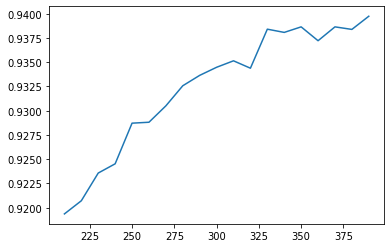

In [123]:
%matplotlib inline
import matplotlib.pyplot as plt

score = []
for i in range(390, 200, -10):
    X_fschi = SelectKBest(chi2, k=i).fit_transform(x_fsvar, y)
    once = cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()
    score.append(once)
    
plt.plot(range(390,200, -10), score)
plt.show()

In [124]:
chivalue, pvalues_chi = chi2(x_fsvar, y)


In [125]:
chivalue

array([ 945664.84392643, 1244766.05139164, 1554872.30384525,
       1834161.78305343, 1903618.94085294, 1845226.62427198,
       1602117.23307537,  708535.17489837,  974050.20513718,
       1188092.19961931, 1319151.43467036, 1397847.8836796 ,
       1433554.26798015, 1429043.15373433, 1332663.17213405,
       1101423.25372261,  809989.56940485,  519266.71772284,
        285681.88297156,  191589.23696468,  902883.1255264 ,
       1237265.16042373, 1503477.73699155, 1625807.41495542,
       1630206.90922916, 1630597.02883804, 1633456.72909664,
       1610816.75571229, 1483382.49543886, 1256290.1574794 ,
        951236.1617682 ,  693192.66191748,  532386.96220361,
        504617.38933715,  575090.36046243,  501025.03733245,
        802341.10683194, 1078344.8724406 , 1226540.98318702,
       1269945.07968831, 1221758.57688808, 1146535.17810241,
       1080657.20185303, 1079065.30979135, 1092222.70610032,
       1064908.45385716, 1023327.00231067,  974163.15420165,
        918857.12860617,

In [126]:
pvalues_chi

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [128]:
k = chivalue.shape[0] - (pvalues_chi > 0.05).sum()
k

392

In [129]:
X_fschi = SelectKBest(chi2, k=392).fit_transform(x_fsvar, y)
cross_val_score(RFC(n_estimators=10, random_state=0), X_fschi, y, cv=5).mean()

0.9390476190476191

In [130]:
chivalue.shape

(392,)

#### F检验

In [132]:
from sklearn.feature_selection import f_classif

F, pvalues_f = f_classif(x_fsvar, y)
F, pvalues_f

(array([ 618.65383492,  846.18897012, 1115.40617051, 1362.3677305 ,
        1452.03355369, 1381.09095571, 1138.26505266,  464.29616121,
         660.00977785,  849.66393412, 1004.7450309 , 1124.76177588,
        1200.99190762, 1209.29489877, 1110.4944286 ,  854.66183292,
         577.52063451,  342.09729054,  178.67397866,  118.01145533,
         612.12261014,  899.40904291, 1196.17528948, 1424.49864852,
        1569.26556677, 1742.49910702, 1910.98023795, 1969.20520223,
        1731.37475948, 1295.09668012,  839.15325001,  531.97951763,
         371.82392681,  336.00820537,  378.93378743,  317.47025479,
         528.94881012,  766.40792176,  947.63168717, 1086.0472161 ,
        1177.72017709, 1253.79641973, 1344.06961068, 1507.33781169,
        1616.50454434, 1512.25864876, 1289.65180587, 1051.26276412,
         839.48869386,  680.07426932,  600.85538567,  633.55772663,
         683.96908509,  347.65867784,  452.76238211,  509.16387684,
         515.7498157 ,  532.86107778,  594.62512

In [133]:
k = F.shape[0] - (pvalues_f > 0.05).sum()

In [134]:
k

392

#### 互信息法

In [135]:
from sklearn.feature_selection import mutual_info_classif as MIC

result = MIC(x_fsvar, y)

In [136]:
k = result.shape[0] - sum(result <= 0)
k

392

## Emdedded嵌入法

In [138]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

RFC_ = RFC(n_estimators=10, random_state=0)

X_embedded = SelectFromModel(RFC_, threshold=0.005).fit_transform(X, y)

In [140]:
X_embedded.shape

(42000, 47)

In [141]:
import numpy as np
import matplotlib.pyplot as plt

RFC_.fit(X,y).feature_importances_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96726660e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.39623410e-06,
       7.35101726e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.70425050e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.09114204e-06, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

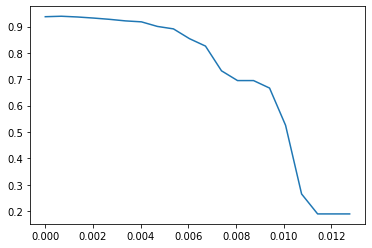

In [142]:
threshold = np.linspace(0,(RFC_.fit(X,y).feature_importances_).max(), 20 )

score = []
for i in threshold:
    X_embedded = SelectFromModel(RFC_, threshold=i).fit_transform(X, y)
    once = cross_val_score(RFC_, X_embedded, y, cv=5).mean()
    score.append(once)
    
plt.plot(threshold, score)
plt.show()

In [145]:
X_embedded = SelectFromModel(RFC_, threshold=0.00067).fit_transform(X,y)
X_embedded.shape

(42000, 324)

In [146]:
cross_val_score(RFC_, X_embedded, y, cv=5).mean()

0.9391190476190475

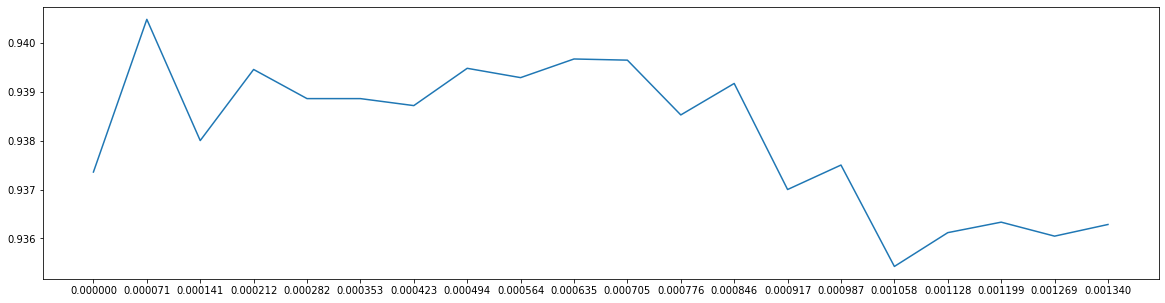

In [157]:
score2 = []
for i in np.linspace(0,0.00134,20):
    X_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00134,20),score2)
plt.xticks(np.linspace(0,0.00134,20))
plt.show()

In [161]:
X_embedded = SelectFromModel(RFC_,threshold=0.000564).fit_transform(X,y)
X_embedded.shape
cross_val_score(RFC_,X_embedded,y,cv=5).mean()

0.9392857142857144

## 包装法

In [149]:
from sklearn.feature_selection import RFE

RFC_  = RFC(n_estimators=10, random_state=0)
selector = RFE(RFC_,n_features_to_select=340,step=50).fit(X,y)

In [150]:
selector.support_.sum()

340

In [151]:
selector.ranking_

array([10,  9,  8,  7,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  6,  6,
        5,  6,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  6,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  6,  6,  5,  4,
        4,  5,  3,  4,  4,  4,  5,  4,  5,  7,  6,  7,  7,  7,  8,  8,  8,
        8,  8,  8,  8,  8,  6,  7,  4,  3,  1,  2,  3,  3,  1,  1,  1,  1,
        1,  3,  3,  4,  5,  5,  5,  8,  8,  9,  9,  9,  9,  8,  9,  9,  4,
        4,  3,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  4,
        5,  5,  9,  9, 10, 10, 10, 10,  7,  4,  4,  3,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  3,  3,  5,  8, 10, 10, 10,
       10,  9,  4,  4,  3,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  3,  4, 10, 10, 10, 10,  9,  7,  4,  3,  2,  2,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        4,  4, 10,  9, 10

In [152]:
X_wrapper = selector.transform(X)

In [153]:
cross_val_score(RFC_, X_wrapper, y, cv=5).mean()

0.9379761904761905

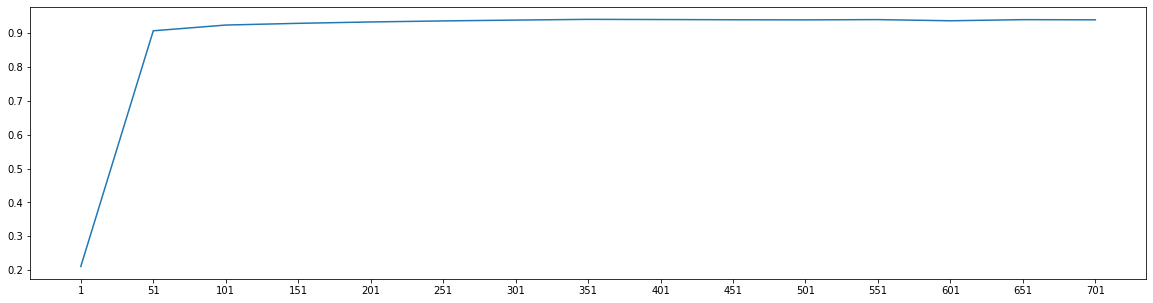

In [162]:
score = []
for i in range(1,751,50):
    X_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()